# Glioma analysis

## 1. Regression analysis

In [1]:
from utils import load_data, cross_validate_regression

from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
X, y = load_data()

models = [
    ('Ridge', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor(n_estimators=30, max_depth=8, n_jobs=-1, random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=30, max_depth=4, random_state=42))
]

results_list = []
for model_name, model in models:
    results = cross_validate_regression(X, y, model=model, model_name=model_name)
    results_list.append(results)
    print(f'{model_name} R2: {results["mean_score"]:.2f}')

Ridge R2: -1.37
Decision Tree R2: -1.84
Random Forest R2: -0.27
Gradient Boosting R2: -0.36


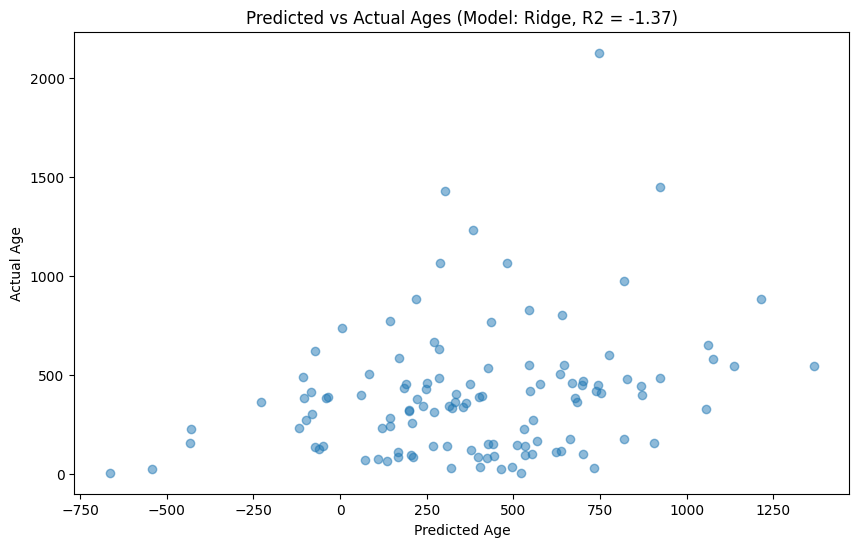

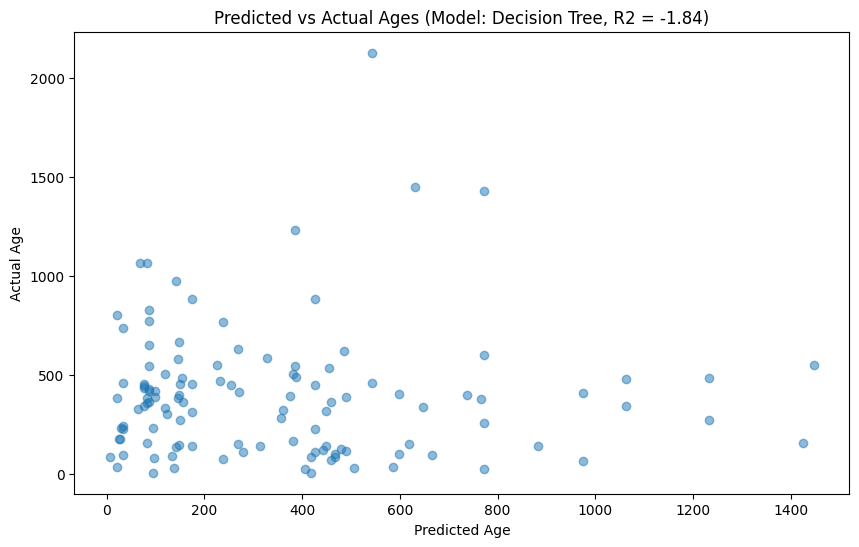

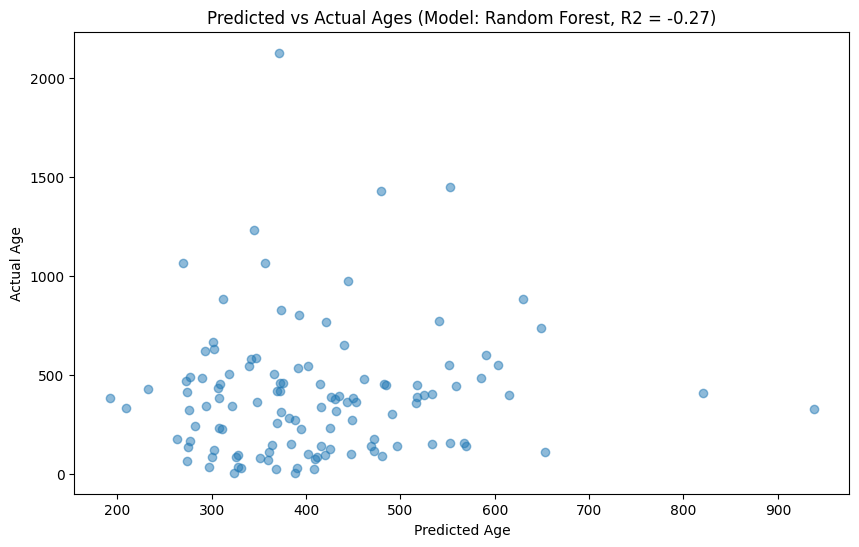

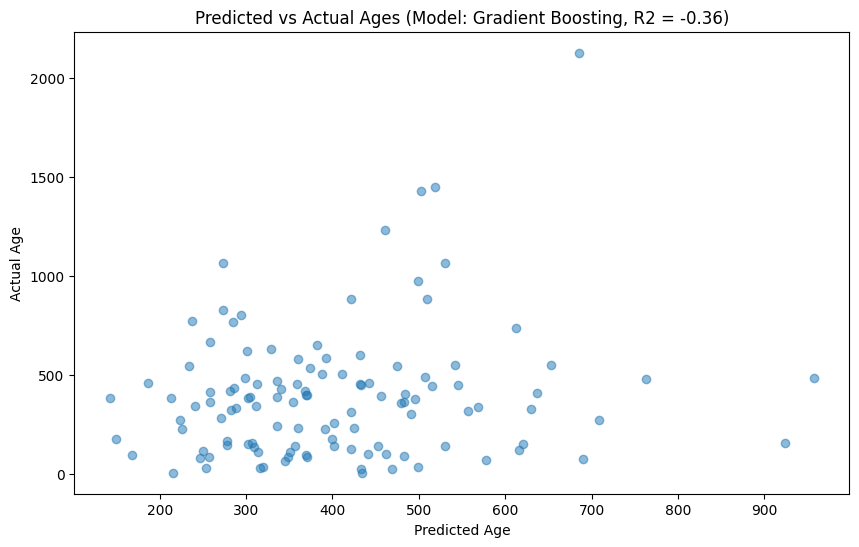

In [3]:
import matplotlib.pyplot as plt

for results in results_list:
    plt.figure(figsize=(10, 6))
    plt.scatter(results['predictions'], y, alpha=0.5)
    plt.xlabel('Predicted Age')
    plt.ylabel('Actual Age')
    plt.title(f'Predicted vs Actual Ages (Model: {results["model_name"]}, R2 = {results["mean_score"]:.2f})')

## 2. Classification analysis

In [1]:
from utils import load_data, cross_validate_classification, binarize_y

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X, y = load_data()
y_binary = binarize_y(y, threshold=720)

# Create models with scaling for Logistic Regression
models = [
    ('Logistic Regression', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(max_iter=1000))
    ])),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

results_list = []
for model_name, model in models:
    results = cross_validate_classification(X, y_binary, model=model, model_name=model_name)
    results_list.append(results)
    print(f'{results["model_name"]} ROC-AUC: {results["mean_score"]:.2f}')

Logistic Regression ROC-AUC: 0.60
Decision Tree ROC-AUC: 0.49
Random Forest ROC-AUC: 0.62
Gradient Boosting ROC-AUC: 0.55


In [3]:
import numpy as np

for (model_name, _), results in zip(models, results_list):
    print(f'\n{model_name}:')
    print(f'ROC-AUC: {results["mean_score"]:.2f}')
    print('Confusion Matrix:')
    print(results['confusion_matrix'])
    print()


Logistic Regression:
ROC-AUC: 0.60
Confusion Matrix:
[[98  5]
 [14  0]]


Decision Tree:
ROC-AUC: 0.49
Confusion Matrix:
[[97  6]
 [13  1]]


Random Forest:
ROC-AUC: 0.62
Confusion Matrix:
[[103   0]
 [ 14   0]]


Gradient Boosting:
ROC-AUC: 0.55
Confusion Matrix:
[[95  8]
 [14  0]]



## 3. Classification with feature selection analysis

In [4]:
from utils import load_data, cross_validate_classification_with_feature_selection, binarize_y

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd

In [10]:
X, y = load_data()
y_binary = binarize_y(y, threshold=720)

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=50, max_depth=5, random_state=42))
]

# Test with feature selection
n_features = 10  # Adjust this value
results_list = []

for model_name, model in models:
    results = cross_validate_classification_with_feature_selection(
        X, y_binary, 
        model=model,
        n_features=n_features,
        selection_method='f_classif',
        cv=5
    )
    results_list.append((model_name, results))
    print(f'{model_name} ROC-AUC: {results["mean_score"]:.4f} ± {results["std_score"]:.4f}')

Logistic Regression ROC-AUC: 0.4008 ± 0.1477
Decision Tree ROC-AUC: 0.5333 ± 0.1028
Random Forest ROC-AUC: 0.5449 ± 0.1442
Gradient Boosting ROC-AUC: 0.5748 ± 0.0522


In [11]:
# Print confusion matrices
print(f'\n{"="*60}')
print(f'Results with {n_features} selected features')
print(f'{"="*60}')

for model_name, results in results_list:
    print(f'\n{model_name}:')
    print(f'ROC-AUC: {results["mean_score"]:.4f} ± {results["std_score"]:.4f}')
    
    # Format confusion matrix
    cm_df = pd.DataFrame(
        results['confusion_matrix'],
        index=['Actual 0', 'Actual 1'],
        columns=['Predicted 0', 'Predicted 1']
    )
    print('Confusion Matrix:')
    print(cm_df)
    print()


Results with 10 selected features

Logistic Regression:
ROC-AUC: 0.4008 ± 0.1477
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          103            0
Actual 1           14            0


Decision Tree:
ROC-AUC: 0.5333 ± 0.1028
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           92           11
Actual 1           12            2


Random Forest:
ROC-AUC: 0.5449 ± 0.1442
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          102            1
Actual 1           14            0


Gradient Boosting:
ROC-AUC: 0.5748 ± 0.0522
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           95            8
Actual 1           12            2

